## Problem Statement:

##### Pick up the following stocks and generate forecasts accordingly

### Stocks:

1.NASDAQ.AAPL
2.NASDAQ.ADP
3.NASDAQ.CBOE
4.NASDAQ.CSCO
5.NASDAQ.EBAY

### 1.NASDAQ.AAPL

### Importing libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest
from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline


### Reading dataset

In [21]:
df = pd.read_csv('data_stocks.csv')
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


### Data Normalization

In [22]:
df["AAPL_log"] = df["NASDAQ.AAPL"].apply(lambda x:np.log(x) )

In [23]:
df["AAPL_log"].head()

0    4.967589
1    4.967728
2    4.967659
3    4.967310
4    4.967449
Name: AAPL_log, dtype: float64

In [24]:
type(df["DATE"][0])

numpy.int64

In [25]:
import datetime as dt

### Converting date into readable format

In [26]:
df["DATE_org"]=df["DATE"].apply(lambda x:dt.datetime.fromtimestamp(x).strftime("%Y-%m-%d %H:%M:%S") )

In [27]:
import statsmodels.api as sm

### Checking Durbin-watson value for AAPL_log feature

In [28]:
sm.stats.durbin_watson(df["AAPL_log"])

1.5195875753588083e-08

### Data Visualisation for target feature

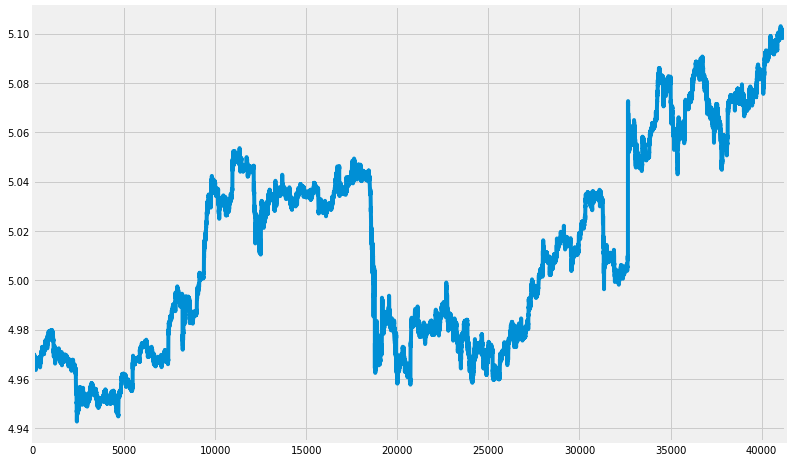

In [29]:
%matplotlib inline
df["AAPL_log"].plot(figsize=(12,8));

#### Observation:
We see the trend increase with year

### Visualisizing Auto-correlation factor and Partial Auto-correlation factor

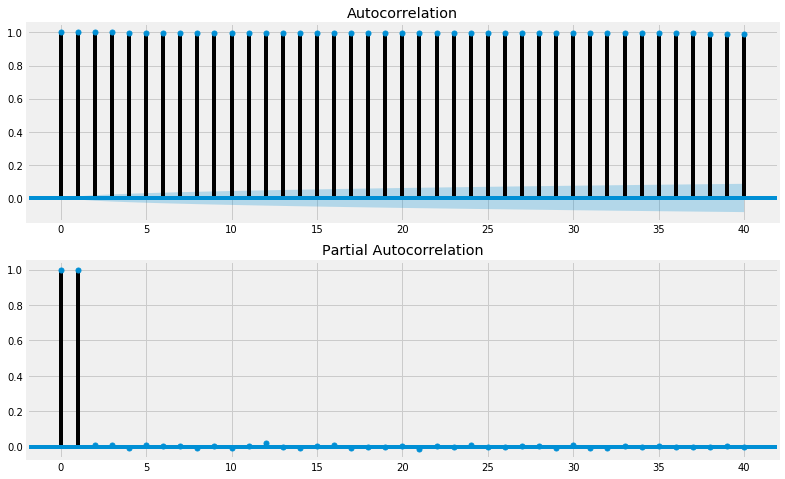

In [30]:
#show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df["AAPL_log"].values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df["AAPL_log"], lags=40, ax=ax2)

### Dropping null values from AAPL_log

In [31]:
array = (df["AAPL_log"].dropna().as_matrix())

C:\Users\Lenovo-Pc\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [32]:
array

array([4.9675886 , 4.96772779, 4.9676589 , ..., 5.0999274 , 5.09913445,
       5.09974447])

In [33]:
df["difflog_AAPLE"] = df["AAPL_log"]-df["AAPL_log"].shift(periods=-1)

### ARMA model build

In [34]:
model = sm.tsa.ARMA(array, (2,0)).fit()
print(model.params)

[5.02083888 0.99073775 0.0091842 ]


### Metrics for model

In [35]:
print(model.aic, model.bic, model.hqic)

-492715.6402172709 -492681.1290404895 -492704.7324359643


### searching forr best parameters


In [36]:
aic=99999
b_p,b_d,b_q=0,0,0
for p in range(3):
    for d in range(1,3):
        for q in range(3):
            try:
                model = ARIMA(array,(p,d,q)).fit()
                if(aic > model.aic):
                    aic = model.aic
                    b_p,b_d,b_q=p,d,q
            except:
                pass
print(b_p,b_d,b_q)

C:\Users\Lenovo-Pc\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Lenovo-Pc\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Lenovo-Pc\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Lenovo-Pc\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\Lenovo-Pc\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarn

1 1 2


C:\Users\Lenovo-Pc\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Lenovo-Pc\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


### Fitting ARIMA model

In [37]:
model = ARIMA(array, (1,1,0)).fit()

### Checking Durbin_watson value for residuals

In [38]:
sm.stats.durbin_watson(model.resid)

2.0003049069168832

### Model Prediction

In [39]:
pred = model.predict()
pred

array([3.19911457e-06, 1.93976801e-06, 3.86675925e-06, ...,
       2.66446398e-06, 9.43767244e-06, 1.05719402e-05])

### Performance Metrics

In [40]:
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(pred,df["NASDAQ.EBAY"][:-1])))

34.81183087984835
